In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/genomicselection-data-weat/DATA/wheat.Y
/kaggle/input/genomicselection-data-weat/DATA/wheat.X


In [2]:
pip install talos


     |████████████████████████████████| 53 kB 388 kB/s            
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 52 kB 402 kB/s            
     |████████████████████████████████| 5.4 MB 973 kB/s            
     |████████████████████████████████| 14.8 MB 45.6 MB/s            
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 2.6 MB 55.3 MB/s            
  Created wheel for chances: filename=chances-0.1.9-py3-none-any.whl size=41609 sha256=a0716d0e10346f9a77d4aeeb299df14459307b33b8387e3bd05deb7ed2fc4d02
  Stored in directory: /root/.cache/pip/wheels/f3/2e/7e/316f7da11ccf2195ff05e4a0186a4b5975be9bd0b0004198b6
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=77046 sha256=34c69d06e40fdb7abc97abbe22d293dc48c8abf6877a6e44aace3c1e31b1b8ae
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built chances wrapt
  Attempti

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# keres modules
from keras import regularizers
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Dropout
from keras.layers import Flatten, Conv1D, MaxPooling1D
from keras.activations import relu, elu, linear, softmax
from keras.callbacks import EarlyStopping, Callback
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam # - Works

from keras.losses import mean_squared_error, categorical_crossentropy, logcosh
from keras.utils.np_utils import to_categorical



**Matrix Y contains the average grain yield, column 1: Grain yield for environment 1 and so on.**

**Matrix X contains marker genotypes.**


In [4]:
# load data as a pandas dataframe
X = pd.read_csv('/kaggle/input/genomicselection-data-weat/DATA/wheat.X', header=None, sep='\s+')
Y = pd.read_csv('/kaggle/input/genomicselection-data-weat/DATA/wheat.Y', header=None, sep='\s+')

In [5]:
print(X.head(10))
print('#'*50)
print(X.shape)

   0     1     2     3     4     5     6     7     8     9     ...  1269  \
0     0     1     1     1     1     0     1     1     1     1  ...     1   
1     1     1     1     1     1     0     1     1     0     1  ...     1   
2     1     1     1     1     1     0     1     1     0     1  ...     1   
3     0     1     1     1     1     0     1     1     1     1  ...     1   
4     0     1     1     1     1     0     1     1     1     1  ...     1   
5     1     1     1     1     1     0     1     1     1     1  ...     1   
6     1     1     1     1     1     0     1     1     0     1  ...     1   
7     1     1     0     1     1     0     0     1     1     1  ...     1   
8     0     1     0     1     1     0     1     1     0     1  ...     1   
9     0     0     0     1     1     0     1     1     1     1  ...     1   

   1270  1271  1272  1273  1274  1275  1276  1277  1278  
0     0     1     1     1     0     0     0     0     1  
1     1     0     0     0     0     1     1    

In [6]:
print(Y.head(10))
print('#'*50)
print(Y.shape)

          0         1         2         3
0  1.671629 -1.727470 -1.890285  0.050916
1 -0.252703  0.409522  0.309386 -1.738759
2  0.341815 -0.648626 -0.799559 -1.053569
3  0.785439  0.093949  0.570468  0.551757
4  0.998318 -0.282481  1.618682 -0.114285
5  2.336097  0.626476  0.073533  0.719586
6  0.617411 -0.313592  0.054326  0.003354
7  0.647218 -0.424041 -0.708083  0.964327
8 -0.967639 -1.789263 -1.936040 -1.502758
9 -1.050823 -1.617623 -1.987209 -0.562404
##################################################
(599, 4)


In [7]:
# data pattitioning into train and validation 
itrait=1
X_train, X_test, y_train, y_test = train_test_split(X, Y[itrait], test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(479, 1279) (479,)
(120, 1279) (120,)


In [8]:
# print basic statistics: max, min, mean, sd
print('      min max mean sd')
print('Train: ', y_train.min(), y_train.max(), y_train.mean(), np.sqrt(y_train.var()))
print('Test: ', y_test.min(), y_test.max(), y_test.mean(), np.sqrt(y_test.var()))


      min max mean sd
Train:  -2.94962633054436 2.70663029696398 0.016566470061665558 1.0023619039581169
Test:  -2.82463492534907 2.35327484796784 -0.06612782632948042 0.9919132940279246


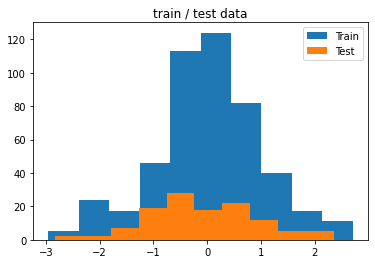

In [9]:
# basic histograms
plt.title('train / test data')
plt.hist(y_train, label='Train')
plt.hist(y_test, label='Test')
plt.legend(loc='best')
plt.show()

**Marker PCA, use whole x with different color for train and test**

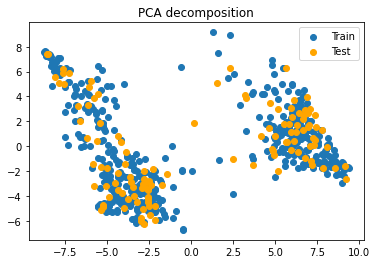

In [10]:
X = np.concatenate((X_train, X_test))
pca = PCA(n_components=2)
p = pca.fit(X).fit_transform(X)
Ntrain=X_train.shape[0]
plt.title('PCA decomposition')
plt.scatter(p[0:Ntrain,0], p[0:Ntrain,1], label='Train')
plt.scatter(p[Ntrain:,0], p[Ntrain:,1], label='Test', color='orange')
plt.legend(loc='best')
plt.show()

**SNP preselection according to a simple GWAS**


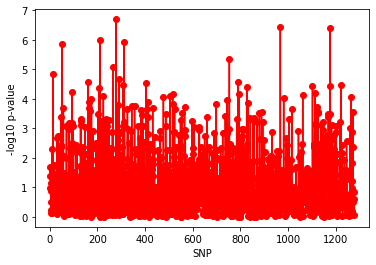

In [11]:
pvals = []
for i in range(X_train.shape[1]):
    b, intercept, r_value, p_value, std_err = stats.linregress(X_train[i], y_train)
    pvals.append(-np.log10(p_value))
pvals = np.array(pvals)    

# plot GWAS
plt.ylabel('-log10 p-value')
plt.xlabel('SNP')
plt.plot(pvals, marker='o', color='red')
plt.show()

# select N_best most associated SNPs
# N_best = X_train.shape[1] # all SNPs
N_best = 100
snp_list = pvals.argsort()[-N_best:]

# select by min P_value
min_p_value = 2 
snp_list = np.nonzero(pvals>min_p_value)



**Standard penalized methods**
**lasso using scikit-learn**


In [12]:
# alpha is regularization parameter
lasso = linear_model.Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
y_hat = lasso.predict(X_test)

# mean squared error
mse = mean_squared_error(y_test, y_hat)
print('\nMSE in prediction=', mse)

# correlation btw predicted and observed
corr = np.corrcoef(y_test,y_hat)[0,1]
print('\nCorr obs vs pred =', corr)




MSE in prediction= tf.Tensor(0.7256796222925578, shape=(), dtype=float64)

Corr obs vs pred = 0.5106583664754683


2022-04-01 13:41:18.639829: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


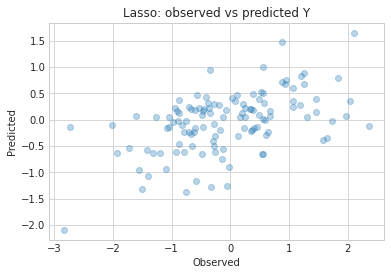

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# plot observed vs predicted targets
plt.title('Lasso: observed vs predicted Y')
plt.ylabel('Predicted')
plt.xlabel('Observed')
plt.scatter(y_test, y_hat, marker='o', cmap='viridis', alpha=0.3)
plt.show()

**Implements a standard fully connected neural network for quantitative targets**

In [14]:
# number of SNPs in data
nSNP = X_train.shape[1]
nSNP

1279

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                81920     
_________________________________________________________________
activation (Activation)      (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 84,033
Trainable params: 84,033
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20


2022-04-01 13:41:19.543979: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


15/15 [==============================] - 1s 2ms/step - loss: 1.1114
Epoch 2/20
15/15 [==============================] - 0s 2ms/step - loss: 0.9287
Epoch 3/20
15/15 [==============================] - 0s 2ms/step - loss: 0.9211
Epoch 4/20
15/15 [==============================] - 0s 2ms/step - loss: 0.9057
Epoch 5/20
15/15 [==============================] - 0s 2ms/step - loss: 0.8453
Epoch 6/20
15/15 [==============================] - 0s 2ms/step - loss: 0.8072
Epoch 7/20
15/15 [==============================] - 0s 2ms/step - loss: 0.7863
Epoch 8/20
15/15 [==============================] - 0s 2ms/step - loss: 0.7175
Epoch 9/20
15/15 [==============================] - 0s 2ms/step - loss: 0.7970
Epoch 10/20
15/15 [==============================] - 0s 2ms/step - loss: 0.7310
Epoch 11/20
15/15 [==============================] - 0s 2ms/step - loss: 0.6523
Epoch 12/20
15/15 [==============================] - 0s 2ms/step - loss: 0.7202
Epoch 13/20
15/15 [==============================] - 0s 2ms/

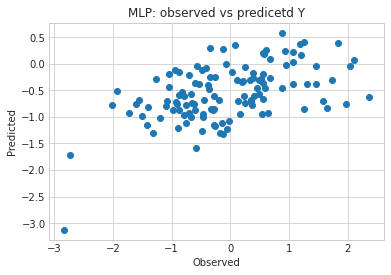

In [15]:
# Instantiate
model = Sequential()

# add first layes
model.add(Dense(64, input_dim=nSNP))
model.add(Activation('relu'))
# add second layer
model.add(Dense(32))
model.add(Activation('softplus'))
#last, output layer
model.add(Dense(1))

# Model Compiling (https://keras.io/models/sequential/) 
# compile(optimizer, loss=None, metrics=None, loss_weights=None, sample_weight_mode=None, weighted_metrics=None, target_tensors=None)
# Stochastic Gradient Descent (‘sgd’) as optimization algorithm
# Mean Squared Error as loss, ie, quantitative variable, regression
model.compile(loss='mean_squared_error', optimizer='sgd')

# list some properties
model.summary()

#tarining
## fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1)
model.fit(X_train, y_train, epochs=20)

# cross-validation: get predicted target values
y_hat = model.predict(X_test, batch_size=128)

mse_prediction = model.evaluate(X_test, y_test, batch_size=128)
print('\MSE in prediction = ', mse_prediction)

# correlation btw predicted and observed
corr = np.corrcoef(y_test, y_hat[:,0])[0,1]
print('\Corr obs vs pred =', corr)

# plot observed vs predicted targets
plt.title('MLP: observed vs predicetd Y')
plt.ylabel('Predicted')
plt.xlabel('Observed')
plt.scatter(y_test, y_hat, marker='o')
plt.show()

**Controlling overfit: regularization, dropout and early stopping**

In [16]:
# deletes current model
del model

model = Sequential()

# Add l1 & l2 regularization in first layer
model.add(Dense(64, input_dim=nSNP,
                kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
model.add(Activation('relu'))
# Add second layer
model.add(Dense(32))
model.add(Activation('softplus'))
## Adding dropout to second layer
model.add(Dropout(0.2))
# Last, output layer
model.add(Dense(1))

# Model Compiling (https://keras.io/models/sequential/) 
model.compile(loss='mean_squared_error', optimizer='sgd')

# Split the train set into proper train & validation
X_train0, X_val, y_train0, y_val = train_test_split(X_train, y_train, test_size=0.1)
nEpochs=10

# Early stopping
early_stopper = EarlyStopping(monitor='val_loss', patience=10, min_delta=0.01)
model.fit(X_train0, y_train0, epochs=nEpochs, verbose=1, validation_data=(X_val, y_val), callbacks=[early_stopper])

# cross-validation
mse_prediction = model.evaluate(X_test, y_test, batch_size=128)
print('\nMSE in prediction =',mse_prediction)

## In this case neither l1 nor l2 regularization helps

Epoch 1/10
14/14 [==============================] - 1s 21ms/step - loss: 3.0124 - val_loss: 2.5028
Epoch 2/10
14/14 [==============================] - 0s 5ms/step - loss: 2.7278 - val_loss: 2.5084
Epoch 3/10
14/14 [==============================] - 0s 5ms/step - loss: 2.6324 - val_loss: 2.4678
Epoch 4/10
14/14 [==============================] - 0s 5ms/step - loss: 2.5367 - val_loss: 2.3580
Epoch 5/10
14/14 [==============================] - 0s 5ms/step - loss: 2.5452 - val_loss: 2.5595
Epoch 6/10
14/14 [==============================] - 0s 5ms/step - loss: 2.5606 - val_loss: 2.3472
Epoch 7/10
14/14 [==============================] - 0s 5ms/step - loss: 2.4734 - val_loss: 2.3120
Epoch 8/10
14/14 [==============================] - 0s 5ms/step - loss: 2.3339 - val_loss: 2.2434
Epoch 9/10
14/14 [==============================] - 0s 5ms/step - loss: 2.3323 - val_loss: 2.2306
Epoch 10/10
1/1 [==============================] - 0s 31ms/step - loss: 2.2043

MSE in prediction = 2.204264640808105